## Análisis de los archivos

### Bibliotecas

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from joblib import dump, load
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score,roc_curve,roc_auc_score

In [2]:
info2 = pd.read_csv('../data/info_02.csv')

In [3]:
info2.describe()

,id,id2,v1,c1,v2
count,17286.000000,17286.000000,17286.000000,17286.000000,17286.000000
mean,4075.651047,4075.651047,119.141542,0.211674,20.617257
std,2347.052912,2347.052912,194.511597,0.408507,1.018207
min,1.000000,1.000000,0.000000,0.000000,19.000000
25%,2042.250000,2042.250000,0.000000,0.000000,19.700000
50%,4086.000000,4086.000000,0.000000,0.000000,20.400000
75%,6102.750000,6102.750000,252.000000,0.000000,21.400000
max,8143.000000,8143.000000,1546.300000,1.000000,23.200000


Las columnad id y id2 son iguales por lo que se puede eliminar una de las columnas


In [4]:
info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 6 columns):
id     17286 non-null int64
id2    17286 non-null int64
v1     17286 non-null float64
c1     17286 non-null int64
v2     17286 non-null float64
v3     16286 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 810.4+ KB


In [5]:
nulos = info2[info2['v3'].isnull()]
print("El documento info2 cuenta con valores nulos en la columna v3 que representan el  {0:f}% de los datos".format(len(nulos)/len(info2)*100))

El documento info2 cuenta con valores nulos en la columna v3 que representan el  5.785028% de los datos


Antes de eliminar esta columna analizaré si la columna tiene una correlación importante con los datos, la columna v3 tiene datos de fechas por lo que cambiaré el formato

In [6]:
info2['v3'] = pd.to_datetime(info2['v3'])

In [7]:
info2.head()

,id,id2,v1,c1,v2,v3
0,1,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,3,426.0,1,23.1,2015-02-04 17:53:00


### Modelo de clasificación

EL archivo info2 cuenta con la columna c1, la cuál entiendo que es la columna que describre la clase a la que pertenece el registro y que me premitirá entrenar un modelo.

In [8]:
clasificacion = info2.copy()
clasificacion.drop(['id2'],axis=1,inplace = True)
clasificacion.head()

,id,v1,c1,v2,v3
0,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,426.0,1,23.1,2015-02-04 17:53:00


La columna de id sugieren que existen registros duplicados en el dataframe por lo que procederé a confirmarlo

In [9]:
clasificacion = clasificacion.sort_values(by=['id'])
clasificacion.duplicated()

0        False
1         True
2        False
3         True
4        False
         ...  
16281     True
16282    False
16283     True
16284    False
16285     True
Length: 17286, dtype: bool

En la celda anterior se ordena por id y se verifica que los datos de las demás columnas estén duplicados. Existen registros con valor True, lo que indica que existen datos duplicados que procederé a eliminar

In [13]:
df_limpio = clasificacion.drop_duplicates(keep='first')

In [14]:
df_limpio.describe()

,id,v1,c1,v2
count,9143.000000,9143.000000,9143.000000,9143.000000
mean,4078.902767,118.805009,0.211090,20.614973
std,2343.811230,194.303810,0.408105,1.018919
min,1.000000,0.000000,0.000000,19.000000
25%,2047.500000,0.000000,0.000000,19.700000
50%,4098.000000,0.000000,0.000000,20.400000
75%,6097.500000,247.350000,0.000000,21.400000
max,8143.000000,1546.300000,1.000000,23.200000


In [15]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143 entries, 0 to 16284
Data columns (total 5 columns):
id    9143 non-null int64
v1    9143 non-null float64
c1    9143 non-null int64
v2    9143 non-null float64
v3    8143 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 428.6 KB


In [16]:
nulos = df_limpio[df_limpio['v3'].isnull()]
print("El dataframe ahora sin duplicados cuenta con el {0:f}% de datos nulos".format(len(nulos)/len(df_limpio)*100))

El dataframe ahora sin duplicados cuenta con el 10.937329% de datos nulos


In [29]:
df_limpio[df_limpio.id.isin(nulos.id)]

,id,v1,c1,v2,v3
13,7,419.0,1,23.1,2015-02-04 17:57:00
16292,7,419.0,1,23.1,NaT
16294,9,419.0,1,23.1,NaT
16,9,419.0,1,23.1,2015-02-04 17:58:59
16297,12,419.0,1,23.1,NaT
...,...,...,...,...,...
16691,8108,412.0,1,20.6,NaT
16231,8116,419.0,1,20.7,2015-02-10 09:06:00
16327,8116,419.0,1,20.7,NaT
16242,8122,433.0,1,20.8,2015-02-10 09:11:59


Los datos nulos son datos repetidos pero sin el valor v3, por eso el método drop_duplicates no los consideró duplicados. Es seguro borrar los valores nulos

In [30]:
df_limpio.dropna(inplace = True)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


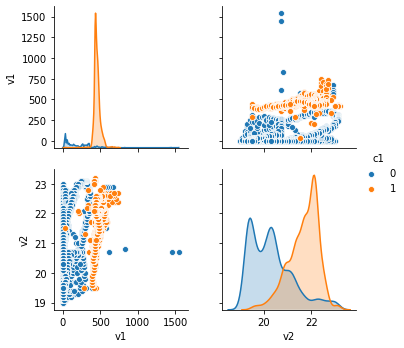

In [31]:
sn.pairplot(df_limpio, vars=["v1", "v2"], hue='c1')

### Matriz de correlación

In [32]:
df_limpio.corr()

,id,v1,c1,v2
id,1.000000,-0.121960,-0.098155,-0.442203
v1,-0.121960,1.000000,0.907352,0.649623
c1,-0.098155,0.907352,1.000000,0.537776
v2,-0.442203,0.649623,0.537776,1.000000


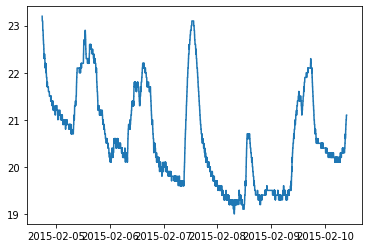

In [34]:
#plt.plot(df_limpio['v3'],df_limpio['v1'])
plt.plot(df_limpio['v3'],df_limpio['v2'])
plt.show()

## Relación entre el tiempo y los datos

In [35]:
info = df_limpio.copy()
info.index = info['v3']

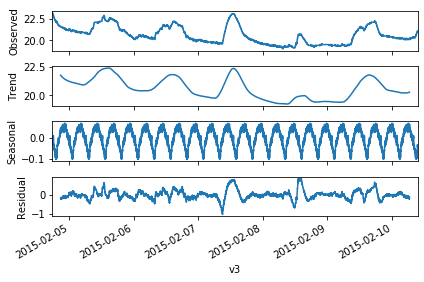

In [36]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(info['v2'],freq=365)
resplot=res.plot()

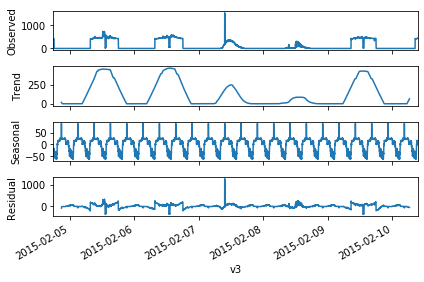

In [37]:
res_2=sm.tsa.seasonal_decompose(info['v1'],freq=365)
resplot_2=res_2.plot()

Existen fluctuaciones periodicas en las series de tiempo, por lo que se puede afirmar que el tiempo es importante para el analisis de datos, por ello se incluirán en el modelo de clasificación.

## Modelos de clasificación

In [38]:
info.drop(['id','v3'],axis=1,inplace=True)

In [39]:
info.reset_index()

,v3,v1,c1,v2
0,2015-02-04 17:51:00,426.0,1,23.2
1,2015-02-04 17:51:59,429.5,1,23.1
2,2015-02-04 17:53:00,426.0,1,23.1
3,2015-02-04 17:54:00,426.0,1,23.1
4,2015-02-04 17:55:00,426.0,1,23.1
...,...,...,...,...
8138,2015-02-10 09:29:00,433.0,1,21.1
8139,2015-02-10 09:29:59,433.0,1,21.1
8140,2015-02-10 09:30:59,433.0,1,21.1
8141,2015-02-10 09:32:00,433.0,1,21.1


In [40]:
X = info.drop('c1',axis=1)
y = info['c1']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression

In [41]:
lg_model = LogisticRegression()

In [42]:
lg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_train_pred = lg_model.predict(X_train)

In [44]:
train_matrix = confusion_matrix(y_train,y_train_pred)
train_matrix

array([[5056,   72],
       [   6, 1380]], dtype=int64)

In [45]:
y_test_pred = lg_model.predict(X_test)

In [46]:
test_matrix = confusion_matrix(y_test,y_test_pred)
test_matrix

array([[1267,   19],
       [   1,  342]], dtype=int64)

In [47]:
print('Las matrices de confusión muestran que el {0:f}% están mal clasificados en las predicciones del train y {1:f}% en test'.format((train_matrix[0][1]+train_matrix[1][0]) / len(y_train) *100,(test_matrix[0][1]+test_matrix[1][0]) / len(y_test) *100))

Las matrices de confusión muestran que el 1.197421% están mal clasificados en las predicciones del train y 1.227747% en test


In [48]:
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print(f'Valor R^2: {train_score, test_score}')

Valor R^2: (0.9285123352986068, 0.9261388625656883)


Junto con los datos arrojados en las matrices de confusión y el score entre los datos predictivos del entrenamiento y el test, que son similares y mayores a 0.9 se puede determinar que tiene un buen ajuste.

In [49]:
y_pred_prob = lg_model.predict_proba(X_test)[::,1]
fpr,tpr,_ = roc_curve(y_test,y_pred_prob)
roc_auc_score(y_test,y_pred_prob)

0.9905882592983872

### Random Forest

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [53]:
rf_train_matrix = confusion_matrix(y_train,rf_train_pred)
rf_test_matrix = confusion_matrix(y_test,rf_test_pred)

print(rf_train_matrix)
print(rf_test_matrix)

[[5116   12]
 [   3 1383]]
[[1276   10]
 [   4  339]]


In [54]:
print('Las matrices de confusión muestran que el {0:f}% están mal clasificados en las predicciones del train y {1:f}% en test'.format((rf_train_matrix[0][1]+rf_train_matrix[1][0]) / len(y_train) *100,(rf_test_matrix[0][1]+rf_test_matrix[1][0]) / len(y_test) *100))

Las matrices de confusión muestran que el 0.230273% están mal clasificados en las predicciones del train y 0.859423% en test


In [55]:
rf_train_score = r2_score(y_train,rf_train_pred)
rf_test_score = r2_score(y_test,rf_test_pred)
print(f'Valor R^2: {rf_train_score, rf_test_score}')

Valor R^2: (0.986252372172809, 0.9482972037959818)


In [56]:
rf_pred_prob = rf.predict_proba(X_test)[::,1]
roc_auc_score(y_test,rf_pred_prob)

0.9980831923971544

El modelo Random Forest muestra mejores resultados comparados con el modelo Logistic Regression, se logró reducir el número de registros mal clasificados (se puede ver en las matrices de confusión)

El área bajo la curva es más cercano a 1 en este modelo, lo cuál es un buen indicador sobre el ajuste del modelo.


## Gaussian Naive Bayes

In [57]:
gnb = GaussianNB()

In [58]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

In [60]:
gnb_train_matrix = confusion_matrix(y_train,gnb_train_pred)
gnb_test_matrix = confusion_matrix(y_test,gnb_test_pred)

print(gnb_train_matrix)
print(gnb_test_matrix)

[[4954  174]
 [   5 1381]]
[[1246   40]
 [   0  343]]


In [61]:
print('Las matrices de confusión muestran que el {0:f}% están mal clasificados en las predicciones del train y {1:f}% en test'.format((gnb_train_matrix[0][1]+gnb_train_matrix[1][0]) / len(y_train) *100,(gnb_test_matrix[0][1]+gnb_test_matrix[1][0]) / len(y_test) *100))

Las matrices de confusión muestran que el 2.747928% están mal clasificados en las predicciones del train y 2.455494% en test


In [62]:
gnb_train_score = r2_score(y_train,gnb_train_pred)
gnb_test_score = r2_score(y_test,gnb_test_pred)
print(f'Valor R^2: {gnb_train_score, gnb_test_score}')

Valor R^2: (0.8359449745955205, 0.8522777251313767)


In [63]:
gnb_pred_prob = gnb.predict_proba(X_test)[::,1]
roc_auc_score(y_test,gnb_pred_prob)

0.9900600320110271

El modelo Gaussian Naive Bayes no funciona muy bien en este dataset, se muestra mayor porcentaje de datos mal clasificados y los scores r-squared y el área bajo la curva son menores.

## KNeighbors

In [64]:
kn = KNeighborsClassifier(n_neighbors=50)

In [65]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [66]:
kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)

In [67]:
kn_train_matrix = confusion_matrix(y_train,kn_train_pred)
kn_test_matrix = confusion_matrix(y_test,kn_test_pred)

print(kn_train_matrix)
print(kn_test_matrix)

[[5057   71]
 [   9 1377]]
[[1267   19]
 [   2  341]]


In [68]:
kn_train_score = r2_score(y_train,kn_train_pred)
kn_test_score = r2_score(y_test,kn_test_pred)
print(f'Valor R^2: {kn_train_score, kn_test_score}')

Valor R^2: (0.9266793182549813, 0.9224458056939727)


In [81]:
kn_pred_prob = kn.predict_proba(X_test)[::,1]
roc_auc_score(y_test,kn_pred_prob)

0.9959158735700456

## SVM

In [69]:
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
svc_train_pred = svc.predict(X_train)
svc_test_pred = svc.predict(X_test)

In [71]:
svc_train_matrix = confusion_matrix(y_train,svc_train_pred)
svc_test_matrix = confusion_matrix(y_test,svc_test_pred)

print(svc_train_matrix)
print(svc_test_matrix)

[[5059   69]
 [   9 1377]]
[[1267   19]
 [   1  342]]


In [72]:
svc_train_score = r2_score(y_train,svc_train_pred)
svc_test_score = r2_score(y_test,svc_test_pred)
print(f'Valor R^2: {svc_train_score, svc_test_score}')

Valor R^2: (0.9285123352986068, 0.9261388625656883)


### Linear SVC

In [74]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [75]:
clf_train_pred = lin_clf.predict(X_train)
clf_test_pred = lin_clf.predict(X_test)

In [76]:
clf_train_matrix = confusion_matrix(y_train,clf_train_pred)
clf_test_matrix = confusion_matrix(y_test,clf_test_pred)

print(clf_train_matrix)
print(clf_test_matrix)

[[4896  232]
 [   3 1383]]
[[1238   48]
 [   0  343]]


In [77]:
clf_train_score = r2_score(y_train,clf_train_pred)
clf_test_score = r2_score(y_test,clf_test_pred)
print(f'Valor R^2: {clf_train_score, clf_test_score}')

Valor R^2: (0.7846204973740074, 0.822733270157652)


# Resultados

Despues de probar varios modelos encuentro satisfactorios los resultados de Random Forest Classifier, por lo que guardaré el modelo entrenado en un archivo para su consulta posterior

In [84]:
dump(rf, 'RandomForest.joblib')

['RandomForest.joblib']

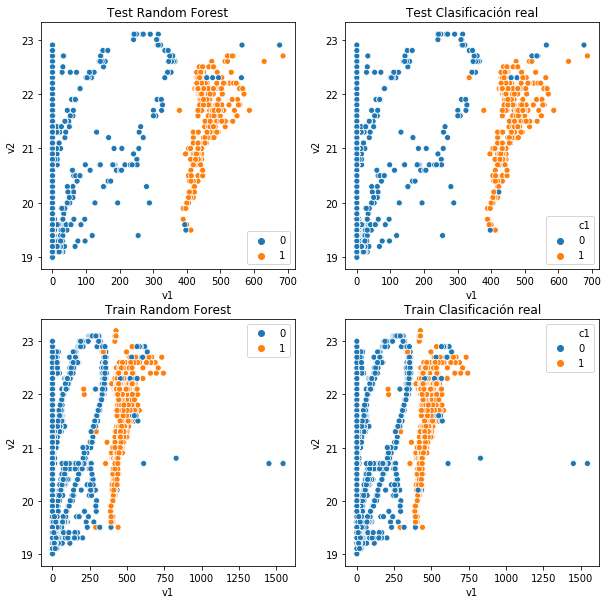

In [85]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
sn.scatterplot(x = 'v1',y='v2',hue = rf_test_pred, data = X_test, ax=axs[0][0])
sn.scatterplot(x = 'v1',y='v2',hue = y_test, data = X_test,ax=axs[0][1])
sn.scatterplot(x = 'v1',y='v2',hue = rf_train_pred, data = X_train, ax=axs[1][0])
sn.scatterplot(x = 'v1',y='v2',hue = y_train, data = X_train,ax=axs[1][1])
axs[0,0].set_title('Test Random Forest')
axs[0,1].set_title('Test Clasificación real')
axs[1,0].set_title('Train Random Forest')
axs[1,1].set_title('Train Clasificación real')
plt.show()
fig.savefig('Resultados.png')